<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
# OpenEO Platform - SH openEO backend Corine Land Cover change over an alpine region
### Showcase of large scale batch processing

In [2]:
import openeo
import rasterio
from matplotlib import pyplot

In [3]:
from openeo.rest.auth.config import RefreshTokenStore
RefreshTokenStore().remove()

In [14]:
# Connect to openEO Platform  back-end (https://openeo.cloud) which has SH production backend implemented
# https://openeo.sentinel-hub.com/production/
connection = openeo.connect("https://openeo.cloud")

# Authenticate via EGI
connection.authenticate_oidc()

OIDC token response did not contain refresh token.


Authenticated using refresh token.


<Connection to 'https://openeocloud.vito.be/openeo/1.0.0/' with OidcBearerAuth>

**1. Have a look at the "CORINE_LAND_COVER" collection**

In [15]:
connection.describe_collection('CORINE_LAND_COVER')

{'assets': {'thumbnail': {'href': 'https://collections.eurodatacube.com/corine-land-cover/corine-land-cover.png',
   'roles': ['thumbnail'],
   'title': 'Thumbnail',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands', 'values': ['CLC', 'dataMask']},
  't': {'extent': ['1990-01-01T00:00:00Z', '2018-01-01T00:00:00Z'],
   'step': 'P6Y',
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-32, 45],
   'reference_system': 3035,
   'step': 0.000248016,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [27, 71],
   'reference_system': 3035,
   'step': 0.000248016,
   'type': 'spatial'}},
 'description': 'The CORINE Land Cover (CLC) inventory consists of 44 land cover and land use classes derived from a \nseries of satellite missions since it was first established.\n',
 'extent': {'spatial': {'bbox': [[-32, 27, 45, 71]]},
  'temporal': {'interval': [['1990-01-01T00:00:00Z',
     '2018-01-01T00:00:00Z']]}},
 'id': 'CORINE_LAND_COVER',
 'keywords': ['copernicus services',
  'sentinel hub',
  'xcube',
  'raster',
  'systematic',
  'machine learning',
  'land cover',
  'CLMS',
  'corine',
  'derived data',
  'open data'],
 'license': 'proprietary',
 'links': [{'href': 'https://collections.eurodatacube.com/corine-land-cover',
   'rel': 'about',
   'title': 'Website describing the collection',
   'type': 'text/html'},
  {'href': 'https://creodias.sentinel-hub.com/ogc/wmts/d2344774-2e63-443f-ac1a-f961d7b19319',
   'rel': 'wmts',
   'wmts:dimensions': {'warnings': True},
   'wmts:layer': 'CORINE-LAND-COVER'},
  {'href': 'https://docs.sentinel-hub.com/api/latest/api/process/',
   'rel': 'about',
   'title': 'Details about running Evalscripts',
   'type': 'text/html'},
  {'href': 'https://custom-scripts.sentinel-hub.com/copernicus_services/corine_land_cover/script.js',
   'rel': 'processing-expression',
   'sentinelhub:layer_name': 'Corine Land Cover',
   'sentinelhub:mosaicking_order': 'mostRecent',
   'sentinelhub:upsampling': 'BICUBIC',
   'title': 'Evalscript to generate Corine Land Cover imagery',
   'type': 'application/javascript'},
  {'href': 'https://collections.eurodatacube.com/corine-land-cover/readme.html#band-information',
   'rel': 'about',
   'title': 'Nomenclature mapping - band values CLC labels',
   'type': 'text/html'},
  {'href': 'https://land.copernicus.eu/terms-of-use',
   'rel': 'license',
   'title': 'License',
   'type': 'text/html'},
  {'href': 'https://collections.eurodatacube.com/corine-land-cover',
   'rel': 'about',
   'title': 'Website describing the collection',
   'type': 'text/html'},
  {'href': 'https://creodias.sentinel-hub.com/ogc/wmts/d2344774-2e63-443f-ac1a-f961d7b19319',
   'rel': 'wmts',
   'wmts:dimensions': {'warnings': True},
   'wmts:layer': 'CORINE-LAND-COVER'},
  {'href': 'https://docs.sentinel-hub.com/api/latest/api/process/',
   'rel': 'about',
   'title': 'Details about running Evalscripts',
   'type': 'text/html'},
  {'href': 'https://custom-scripts.sentinel-hub.com/copernicus_services/corine_land_cover/script.js',
   'rel': 'processing-expression',
   'sentinelhub:layer_name': 'Corine Land Cover',
   'sentinelhub:mosaicking_order': 'mostRecent',
   'sentinelhub:upsampling': 'BICUBIC',
   'title': 'Evalscript to generate Corine Land Cover imagery',
   'type': 'application/javascript'},
  {'href': 'https://collections.eurodatacube.com/corine-land-cover/readme.html#band-information',
   'rel': 'about',
   'title': 'Nomenclature mapping - band values CLC labels',
   'type': 'text/html'},
  {'href': 'https://land.copernicus.eu/terms-of-use',
   'rel': 'license',
   'title': 'License',
   'type': 'text/html'},
  {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
   'rel': 'root'},
  {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
   'rel': 'parent'},
  {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections/CORINE_LAND_COVER',
   'rel': 'self'}],
 'providers': [{'description': '',
   'name': 'Sentinel Hub',
   'roles': ['proce

**2. Define spatial and temporal extend, bands and specify backend to be used**

In [16]:
# small spatial_extent={'west': 12.284088134765625, 'south': 47.00647991252098, 'east': 13.396453857421877, 'north': 47.19344533938292}, 

corine_data = connection.load_collection(
    "CORINE_LAND_COVER", 
    spatial_extent={'west': 6.091834207486049, 'south': 45.31677467526279, 'east': 13.873875609678429, 
                    'north': 48.01944604673565}, # extend covering Alpine region
    temporal_extent=['2000-01-01', '2019-04-30'],
    bands=["CLC"], properties={"provider:backend":lambda v: v =="sentinelhub"}
)

In [17]:
# land cover class 34 is "Glaciers and perpetual snow"
corine_eq_34 = corine_data == 34

**3. Use the filter_temporal process to get the data of the years 2000 and 2018**

In [18]:
# Filter the collections according to the years you want to have a look at
# remember that CORINE is only available in the following years: 1990, 2000, 2006, 2012, 2018 

corine_2000 = corine_eq_34.filter_temporal(extent=['2000-01-01', '2000-01-02'])
corine_2018 = corine_eq_34.filter_temporal(extent=['2018-01-01', '2018-01-02'])

**4. Merge the data into a single datacube**

In [19]:
corine_merged = corine_2000.merge_cubes(corine_2018)

**5. Save the result as a geotiff file**

In [20]:
corine_merged_saved = corine_merged.save_result(format="GTiff")

**6. Create a batch job and start it.**

More info about batch jobs can be found here:

- https://openeo.org/documentation/1.0/glossary.html#data-processing-modes

- https://open-eo.github.io/openeo-python-client/batch_jobs.html

In [21]:
# create the job 
job = corine_merged_saved.create_job(title = 'CORINE_LAND_COVER_demo_test')

# save job id and print it
job_id = job.job_id
print("Batch job created with id: ",job_id)

OpenEoApiError: [500] Internal: Failed to create job on backend 'sentinelhub': OpenEoApiError("[500] Internal: Server error: unsupported operand type(s) for *: 'int' and 'NoneType'") (ref: r-ab95f106d330491587c9dac5a50fc90b)

In [ ]:
# start the job
job.start_job()

In [ ]:
# output batch job status 
print(f'Batch job with id {job.job_id} has status {job.status()}')

In [11]:
# list all jobs of the user
connection.list_jobs()

[{'created': '2022-11-25T14:27:01Z',
  'id': 'sentinelhub-82c03492-dd7c-4135-9d4f-f2347395adf4',
  'status': 'finished',
  'title': 'bigger_batch_job_cost_estimate'},
 {'created': '2022-08-29T14:52:13Z',
  'id': 'sentinelhub-5cdc0083-dd1c-4409-9409-dc5eb98a8b64',
  'status': 'finished',
  'title': 'Mean_NDVI_Ljubljana_demo'},
 {'created': '2023-01-30T11:37:16Z',
  'id': 'sentinelhub-161e48b2-b156-4b5d-aaff-88e910adf7ee',
  'status': 'created',
  'title': 'Mean_NDVI_Ljubljana_demo'},
 {'created': '2023-01-26T14:35:22Z',
  'id': 'sentinelhub-19a9325a-fcc1-483c-9784-1038d7026489',
  'status': 'created',
  'title': 'cost estimate test'}]

In [12]:
# connect to pre-prepared job
job = connection.job('sentinelhub-f17fd23a-95cb-4dc5-b86f-214ffca0e411')

**7. Download results and visualize them**

In [13]:
results = job.get_results()
results

<JobResults for job 'sentinelhub-f17fd23a-95cb-4dc5-b86f-214ffca0e411'>

In [14]:
results.download_file('./demo_data_user/', name="e0d3c236-1500-4cb4-9599-be7ecd5a0b83/E43N25/default.tif")

WindowsPath('demo_data_user/e0d3c236-1500-4cb4-9599-be7ecd5a0b83/E43N25/default.tif')

In [15]:
CLC_2000_2018 = rasterio.open('./demo_data_user/e0d3c236-1500-4cb4-9599-be7ecd5a0b83/E43N25/default.tif')

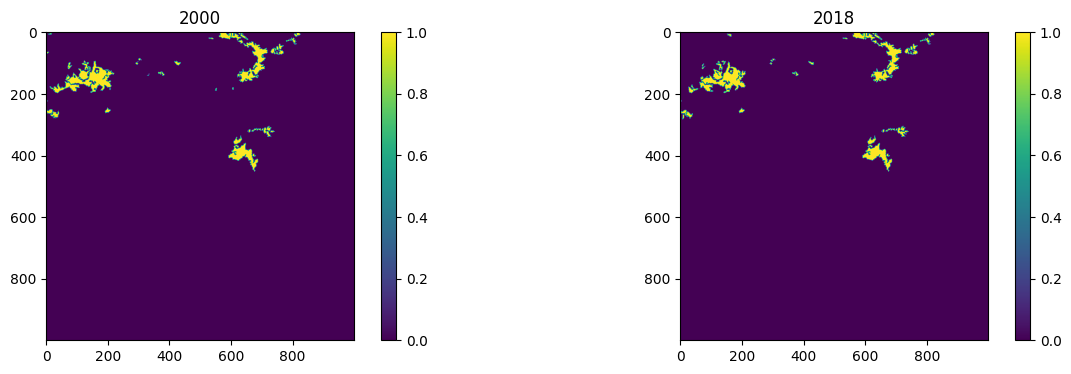

In [16]:
pyplot.figure(figsize=(15,4))

pyplot.subplot(1,2,1)
pyplot.title("2000")
pyplot.imshow(CLC_2000_2018.read(1))
pyplot.colorbar()

pyplot.subplot(1,2,2)
pyplot.title("2018")
pyplot.imshow(CLC_2000_2018.read(2))
pyplot.colorbar()

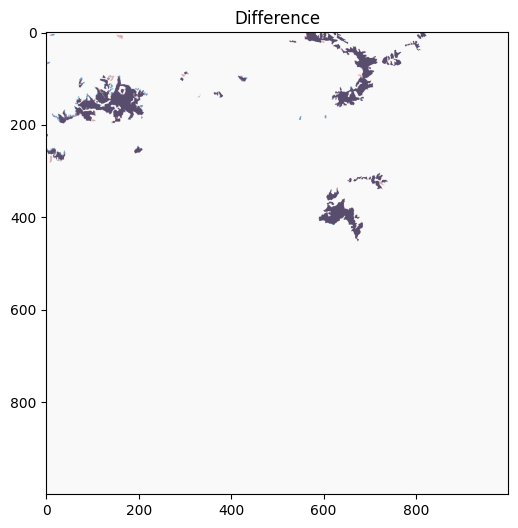

In [17]:
pyplot.figure(figsize=(10,6))
pyplot.title("Difference")
pyplot.imshow(CLC_2000_2018.read(1), cmap='Blues', alpha=0.7)
pyplot.imshow(CLC_2000_2018.read(2), cmap='Reds', alpha=0.3)
pyplot.show()